In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

num_user = 100
num_item = 5
user_id = [i for i in range(num_user)]
data_dict = {}
data_dict["user_id"] = user_id

for i in range(num_item):
    data_dict[f"item_{i}"] = np.random.randint(10, size=(num_user))

df = pd.DataFrame(data=data_dict).set_index("user_id")

In [2]:
df

,item_0,item_1,item_2,item_3,item_4
user_id,,,,,
0,3,7,6,6,9
1,0,8,5,8,3
2,9,1,2,2,6
3,2,6,2,7,8
4,6,3,5,0,5
...,...,...,...,...,...
95,5,1,5,0,6
96,7,7,8,4,5
97,1,6,4,2,4


In [3]:
k = 4
alpha = 0.005
beta = 1
loop = 10000
loss = []

P = np.random.rand(k, df.shape[1]) # item
Q = np.random.rand(k, df.shape[0]) # user
R = df.values

In [4]:
P

array([[0.14344101, 0.50982774, 0.36146269, 0.62428831, 0.50749401],
       [0.79166034, 0.06006737, 0.86238293, 0.84273987, 0.81573661],
       [0.33813679, 0.21276463, 0.35902149, 0.61691091, 0.30069166],
       [0.88748824, 0.46099268, 0.54898315, 0.50882493, 0.63185112]])

In [5]:
Q

array([[0.54216514, 0.84445895, 0.47733018, 0.85690556, 0.47809739,
        0.93111621, 0.21138431, 0.69123802, 0.00623764, 0.32910203,
        0.65560602, 0.14437317, 0.05306876, 0.08192314, 0.11387591,
        0.13247591, 0.52775192, 0.62472438, 0.60738956, 0.10852548,
        0.38506487, 0.32780368, 0.66285976, 0.83595572, 0.86825676,
        0.27497323, 0.93368806, 0.63617743, 0.11544386, 0.74089442,
        0.30450211, 0.5584805 , 0.50499187, 0.63708504, 0.13963761,
        0.63102715, 0.62521012, 0.05450582, 0.91421177, 0.90574876,
        0.25620017, 0.03226584, 0.53548944, 0.54726117, 0.51875128,
        0.65293498, 0.51658758, 0.61324224, 0.19912571, 0.43835818,
        0.49759919, 0.50796086, 0.94369839, 0.04263979, 0.55954666,
        0.59973885, 0.42764062, 0.65977954, 0.87798216, 0.09436336,
        0.44456043, 0.45317471, 0.0188726 , 0.30822241, 0.28864082,
        0.47860429, 0.95045128, 0.98450962, 0.681541  , 0.24869998,
        0.82876292, 0.01333197, 0.49505287, 0.01

In [7]:
for i in range(loop):
    e = R - Q.T @ P
    obj = 1 / 2 * (e ** 2).sum() + beta / 2 * ((P ** 2).sum() + (Q ** 2).sum())
    loss.append(obj)
    p_grad = -(Q @ e) + beta * P
    q_grad = -(P @ e.T) + beta * Q
    P = P - alpha * p_grad
    Q = Q - alpha * q_grad

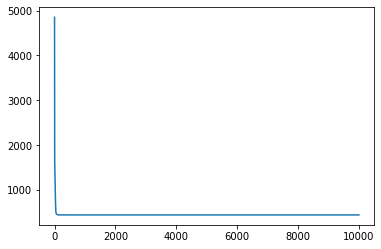

In [8]:
plt.plot(np.arange(loop), loss);

In [9]:
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(Q.T)
dist, index = neigh.kneighbors(Q.T)

In [10]:
index[0]

array([ 0, 65, 28, 84, 75])

In [11]:
df.loc[index[0]]

,item_0,item_1,item_2,item_3,item_4
user_id,,,,,
0,3,7,6,6,9
65,6,8,7,6,6
28,3,6,8,6,7
84,5,5,6,6,3
75,3,5,7,5,7
